In [371]:
import pandas as pd
import numpy as np
import os
import random

from mlchartist.array_builder import build_arrays
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [373]:
min_len = 10000
num_samp = 3

filenames = []

for file in os.listdir(r'../raw_data/processed'):
    if file.endswith('.csv'):
        with open('../raw_data/processed/' + file) as f:
            rows_num = sum(1 for line in f)
            if rows_num >= min_len:
                filenames.append(file)
                    

In [374]:
if len(filenames) < num_samp:
    print('Sample size bigger that nuber of companies available')
else:
    sample = random.sample(filenames, num_samp)

In [375]:
sample

['intc.csv']

In [376]:
dfs = []

for ticker in sample:
    ticker_df = pd.read_csv('../raw_data/processed/'+ticker)
    dfs.append(ticker_df)

In [377]:
df = pd.concat(dfs)

In [378]:
#df = pd.read_csv('../raw_data/processed/aapl.csv')

In [379]:
df['date'] = pd.to_datetime(df['date'])

In [380]:
FIVE_TR = 0.0006
TEN_TR = 0.0012
TWENTY_TR = 0.0024
#INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal', 'ADI','OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff','MACD_signal', '1D_past_return', '5D_past_return', '10D_past_return']
INPUT_COLS = ['RSI', 'Stochastic', 'Stochastic_signal']

In [381]:
df['5D_return_bin'] = (df['5TD_return'] >= FIVE_TR)
df['10D_return_bin'] = (df['10TD_return'] >= TEN_TR)
df['20D_return_bin'] = (df['20TD_return'] >= TWENTY_TR)

In [382]:
test_df = df[df['date'].dt.year >= 2018]
train_df = df[df['date'].dt.year < 2018]

In [383]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [384]:
scaler.fit(train_df[INPUT_COLS])

MinMaxScaler()

In [385]:
train_df.loc[:, INPUT_COLS] = scaler.transform(train_df[INPUT_COLS])
test_df.loc[:, INPUT_COLS] = scaler.transform(test_df[INPUT_COLS])

/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/home/kensei/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [386]:
train_df

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,...,MACD_signal,5TD_return,10TD_return,20TD_return,1D_past_return,5D_past_return,10D_past_return,5D_return_bin,10D_return_bin,20D_return_bin
0,INTC,1972-06-26,0.999662,1.000000,1.000000,0.000000e+00,714414509,0.000461,19.897066,99.906352,...,0.000528,0.000000,0.000000,0.000000,0.000000,0.506089,0.506089,False,False,False
1,INTC,1972-06-27,0.999662,1.000000,1.000000,0.000000e+00,720290438,0.000429,25.605326,99.906352,...,0.000755,0.000000,0.000000,0.000000,0.000000,0.506089,0.506089,False,False,False
2,INTC,1972-06-28,0.999662,1.000000,1.000000,0.000000e+00,747548205,0.000398,30.905853,99.906352,...,0.000974,0.000000,0.000000,0.000000,0.000000,0.506089,0.506089,False,False,False
3,INTC,1972-06-29,0.999662,1.000000,1.000000,0.000000e+00,754729896,0.000369,35.827771,99.906352,...,0.001173,0.000000,0.000000,0.000000,0.000000,0.000000,0.506089,False,False,False
4,INTC,1972-06-30,0.999662,1.000000,1.000000,0.000000e+00,764686322,0.000343,40.398123,99.906352,...,0.001346,0.000000,0.000000,0.000000,0.000000,0.000000,0.506089,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11389,INTC,2017-12-22,0.641872,0.811010,0.872562,-1.745206e+09,75919818461,0.893251,28.222741,29.797269,...,0.374057,0.003206,-0.065952,-0.025490,-0.001244,0.048038,0.077313,True,False,False
11390,INTC,2017-12-26,0.586357,0.685956,0.773226,-1.753666e+09,75903107916,0.879161,27.823559,28.112311,...,0.430570,-0.017768,-0.077666,-0.016880,-0.013310,-0.003889,0.055446,False,False,False
11391,INTC,2017-12-27,0.588268,0.685214,0.727393,-1.759208e+09,75917499706,0.840293,27.452890,27.311771,...,0.473022,-0.036400,-0.058549,0.086141,0.000678,-0.019742,0.064144,False,False,True
11392,INTC,2017-12-28,0.595419,0.693222,0.688130,-1.755927e+09,75927717455,0.807415,27.028427,26.393632,...,0.505001,-0.032910,-0.064491,0.081319,0.002406,-0.028155,0.066493,False,False,True


(array([  1.,   0.,   0.,   0.,   0.,   0.,  34.,   4.,   9.,   5.,  22.,
         32.,  47.,  81., 112., 180., 217., 343., 352., 473., 511., 626.,
        666., 667., 607., 641., 675., 697., 571., 657., 529., 548., 429.,
        389., 297., 221., 201., 138., 110.,  63.,  44.,  52.,  21.,   8.,
         22.,  12.,   7.,   9.,  12.,  52.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

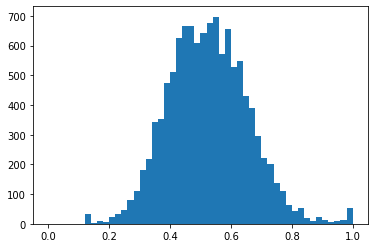

In [387]:
plt.hist(train_df['RSI'], bins=50)

In [402]:
X_train, y_train = build_arrays(train_df,input_cols=INPUT_COLS, target_col='10D_return_bin', time_window=30, stride=5)
X_test, y_test = build_arrays(test_df,input_cols=INPUT_COLS, target_col='10D_return_bin', time_window=30, stride=5)

In [403]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [404]:
X_train.shape

(2273, 30, 3)

In [405]:
y_train = y_train.astype(float)
y_test = y_test.astype(float)

In [406]:
y_train.sum()/len(y_train)

0.49934007919049717

In [407]:
y_test.sum()/len(y_test)

0.593103448275862

In [408]:
# from tensorflow.keras.backend import expand_dims
# X_train = expand_dims(X_train, axis=-1)
# X_test = expand_dims(X_test, axis=-1)

In [409]:
import matplotlib.pyplot as plt

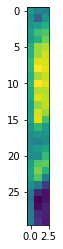

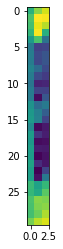

In [410]:
plt.imshow(X_train[200])
plt.show()
plt.imshow(X_train[1])

In [412]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam

optim = RMSprop(learning_rate=0.0001)

def init_model():
    model = Sequential()
    model.add(layers.LSTM(1000, return_sequences=True, input_shape=(30,3)))
    model.add(layers.LSTM(1000))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])
    
    return model

In [413]:
model = init_model()

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

model.fit(X_train, y_train, 
          epochs=200, 
          batch_size=8,
          validation_split=0.2,
          callbacks=[es]
         )

Epoch 1/200
228/228 [==============================] - 92s 402ms/step - loss: 0.6948 - accuracy: 0.5088 - val_loss: 0.7053 - val_accuracy: 0.3780
Epoch 2/200
228/228 [==============================] - 91s 400ms/step - loss: 0.6928 - accuracy: 0.5286 - val_loss: 0.7041 - val_accuracy: 0.3670
Epoch 3/200
228/228 [==============================] - 91s 400ms/step - loss: 0.6917 - accuracy: 0.5297 - val_loss: 0.6963 - val_accuracy: 0.4352
Epoch 4/200
228/228 [==============================] - 91s 401ms/step - loss: 0.6927 - accuracy: 0.5281 - val_loss: 0.7092 - val_accuracy: 0.3670
Epoch 5/200
228/228 [==============================] - 91s 400ms/step - loss: 0.6921 - accuracy: 0.5319 - val_loss: 0.7223 - val_accuracy: 0.3670
Epoch 6/200
228/228 [==============================] - 91s 401ms/step - loss: 0.6919 - accuracy: 0.5330 - val_loss: 0.7204 - val_accuracy: 0.3670
Epoch 7/200
228/228 [==============================] - 91s 401ms/step - loss: 0.6922 - accuracy: 0.5319 - val_loss: 0.7116 -

In [331]:
def initialize_model_2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', input_shape=(30, 4, 1), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Conv2D(64, (2, 2), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(60, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    return model

In [332]:
model_2 = initialize_model_2()

model_2.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_38/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](conv2d_39/Relu)' with input shapes: [?,7,1,128].

In [278]:
es = EarlyStopping(patience=5, restore_best_weights=True)

model_2.fit(X_train, y_train, 
          epochs=200, 
          batch_size=8,
          validation_split=0.2,
            callbacks=[es]
         )

Epoch 1/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6933 - accuracy: 0.5006 - val_loss: 0.6925 - val_accuracy: 0.5267
Epoch 2/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6922 - val_accuracy: 0.5267
Epoch 3/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5072 - val_loss: 0.6925 - val_accuracy: 0.5267
Epoch 4/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5043 - val_loss: 0.6927 - val_accuracy: 0.5267
Epoch 5/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5071 - val_loss: 0.6932 - val_accuracy: 0.4733
Epoch 6/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.6926 - val_accuracy: 0.5267
Epoch 7/200
3402/3402 [==============================] - 6s 2ms/step - loss: 0.6931 - accuracy: 0.5072 - val_loss: 0.6926 - val_ac

In [414]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 52ms/step - loss: 0.6898 - accuracy: 0.6069


[0.6897975206375122, 0.6068965792655945]

In [415]:
y_test.sum()/y_test.shape[0]

0.593103448275862

In [18]:
y_pred = model.predict(X_test)